In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy
%matplotlib inline

## **Import data**

In [70]:
from google.colab import files
uploaded = files.upload()

Saving Credit_cards_App_data.xlsx to Credit_cards_App_data (1).xlsx


In [71]:
df = pd.read_excel('Credit_cards_App_data.xlsx')
df.head()

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,INT_ID,Prev_ID,AGT_ID,Booking_Amt
0,1,Dollie,Scafe,dscafe0@is.gd,Female,02 Garrison Pass,34,Pending,SE,Y,EC,127110,25130,NaN,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,NaN
1,2,Austin,Pennycook,apennycook1@mac.com,Male,007 Miller Road,57,Approve,SE,Y,D,464039,22311,Y,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,278423.4
2,3,Mareah,Tomanek,mtomanek2@bloomberg.com,Female,145 Charing Cross Junction,57,Approve,SE,Y,3P,584420,28557,Y,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,350652.0
3,4,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,Female,268 Algoma Hill,59,Approve,SE,Y,3P,583781,26042,Y,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,350268.6
4,5,Danyette,Stempe,dstempe4@tumblr.com,Female,571 Stone Corner Park,51,Approve,SE,N,MP,551718,27892,Y,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,331030.8


In [72]:
df.shape                                      # prints number of rows and columns of data

(1000, 18)

## **Exploratory data analysis**

**Creating a duplicate df**

In [73]:
df_copy = df.copy()                           # preserve original df

**Identify missing data**

In [74]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Application id            1000 non-null   int64  
 1   first_name                1000 non-null   object 
 2   last_name                 1000 non-null   object 
 3   email                     1000 non-null   object 
 4   gender                    1000 non-null   object 
 5   address                   1000 non-null   object 
 6   age                       1000 non-null   int64  
 7   tdecision                 1000 non-null   object 
 8   empstaus                  1000 non-null   object 
 9   ExCus (Customer in Past)  1000 non-null   object 
 10  Source                    1000 non-null   object 
 11  Salary                    1000 non-null   int64  
 12  ExDebt (Liability)        1000 non-null   int64  
 13  Booking                   699 non-null    object 
 14  INT_ID   

In [75]:
# df_copy.isnull()                            # returns True if value is null

In [76]:
df_copy.isnull().values.sum()                 # returns total number of null values in df

602

In [77]:
df_copy.isnull().sum()                        # returns number of null values in each column

Application id                0
first_name                    0
last_name                     0
email                         0
gender                        0
address                       0
age                           0
tdecision                     0
empstaus                      0
ExCus (Customer in Past)      0
Source                        0
Salary                        0
ExDebt (Liability)            0
Booking                     301
INT_ID                        0
Prev_ID                       0
AGT_ID                        0
Booking_Amt                 301
dtype: int64

**Visualise Missing data**

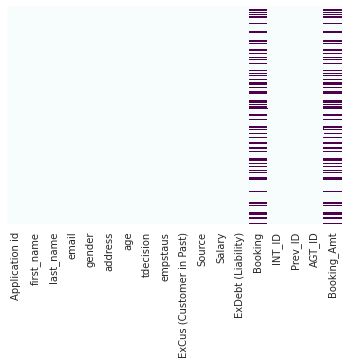

In [78]:
sb.heatmap(df_copy.isnull(), yticklabels=False, cbar = False, cmap="BuPu")      # Purple lines depict NaN values
plt.show()

Approximately 30% of 'Booking' is missing, ie. we can reasonable replace the null values with the mode values.

**Visualise 'tdecision'**

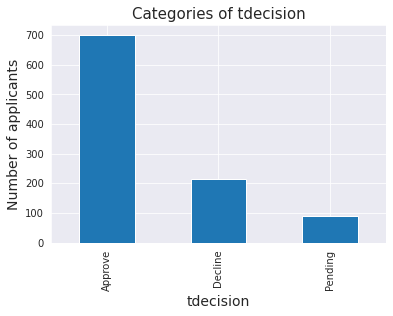


The number of values in tdecision:
Approve    699
Decline    213
Pending     88
Name: tdecision, dtype: int64


In [96]:
df_copy['tdecision'].value_counts().plot.bar()
plt.ylabel('Number of applicants', fontsize=14)
plt.xlabel('tdecision', fontsize=14)
plt.title('Categories of tdecision',fontsize=15)

plt.show()
print(f"\nThe number of values in tdecision:\n{df['tdecision'].value_counts()}")

**Percentage of values in tdecision**

In [16]:
(df['tdecision'].value_counts()/df['tdecision'].count()) * 100

Approve    69.9
Decline    21.3
Pending     8.8
Name: tdecision, dtype: float64

**As a pie chart**

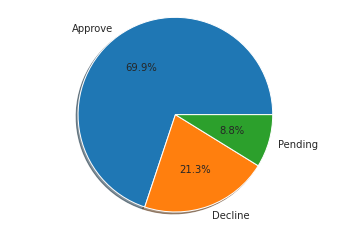

In [54]:
labels = df['tdecision'].astype('category').cat.categories.tolist()
counts = df['tdecision'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)                   #autopct shows the %ge on plot
ax1.axis('equal')
plt.show()

**As a matrix**

In [91]:
dfmatrix = df_copy.copy()      

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(dfmatrix['tdecision'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df)

     Approve  Decline  Pending
0          0        0        1
1          1        0        0
2          1        0        0
3          1        0        0
4          1        0        0
..       ...      ...      ...
995        0        0        1
996        1        0        0
997        0        0        1
998        0        0        1
999        0        1        0

[1000 rows x 3 columns]


**Booking status according to tdecision**

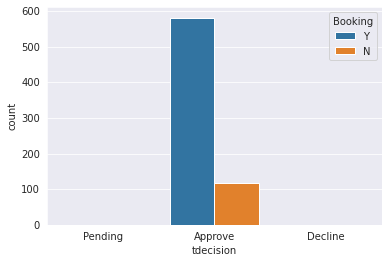

In [10]:
sb.countplot(x='tdecision', hue='Booking', data = df)                           # before data cleaning
plt.show()

In [35]:
#sb.countplot(x='tdecision', hue='gender', data = df)                            # Booking status according to gender

In [36]:
#sb.distplot(df['age'],kde=False, bins=30)                                       # distribution of age
# or
# df['age'].hist(bins=30)

## **Data Cleaning**

We will fill the missing values of 'Booking' by the mode of its current values

In [97]:
df_copy['Booking'].fillna(df_copy['Booking'].mode()[0], inplace=True)

**Creating new dataframe**

In [99]:
clean_df = pd.DataFrame(df_copy.iloc[:,[7,13]])      # clean df only has required columns

In [100]:
clean_df.head()

,tdecision,Booking
0,Pending,Y
1,Approve,Y
2,Approve,Y
3,Approve,Y
4,Approve,Y


**Visualization of missing data after cleaning**

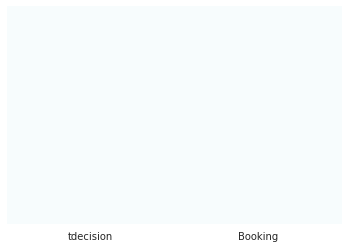

In [102]:
sb.heatmap(clean_df.isnull(), yticklabels=False, cbar = False, cmap="BuPu")       # Purple lines depict NaN values
plt.show()

Graph is blank, which means all NaN values have been handled

**Booking status according to tdecision**

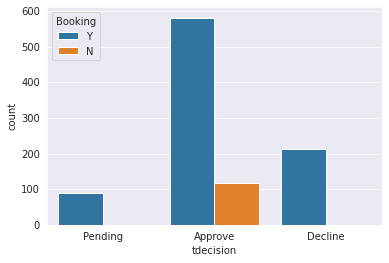

In [103]:
sb.countplot(x='tdecision', hue='Booking', data = clean_df)                       # after data cleaning

In [104]:
aY = 0
aN = 0 
pY = 0
pN = 0
dY = 0
dN = 0
for i in range (0,1000):
    if(clean_df.tdecision[i] == 'Approve' and clean_df.Booking[i] == 'Y'):
        aY += 1
    elif(clean_df.tdecision[i] == 'Approve' and clean_df.Booking[i] == 'N'):
        aN += 1
        
    elif(clean_df.tdecision[i] == 'Pending' and clean_df.Booking[i] == 'Y'):
        pY += 1
    elif(clean_df.tdecision[i] == 'Pending' and clean_df.Booking[i] == 'N'):
        pN += 1
    elif(clean_df.tdecision[i] == 'Decline' and clean_df.Booking[i] == 'Y'):
        dY += 1
    elif(clean_df.tdecision[i] == 'Decline' and clean_df.Booking[i] == 'N'):
        dN += 1
     

In [112]:
df_status = pd.DataFrame({'tdecision': ['Approve', 'Pending', 'Decline'],
                        'Y': [aY,pY,dY],
                        'N': [aN,pN,dN]})
df_status

,tdecision,Y,N
0,Approve,581,118
1,Pending,88,0
2,Decline,213,0
